In [ ]:
import tensorflow as tf
import keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
str(reuters)

"<module 'keras.datasets.reuters' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py'>"

**Posibilidad 1**. A partir de aquí, podemos recodificar los textos de `x_train` y `x_test` en forma de arrays binarios, en los que cada posición corresponde a una palabra del vocabulario contenido en `word_index`, y tendrá valor 1 si la palabra en cuestión aparece en el texto (0 en caso contrario):

In [ ]:
max_words = 20000  # el vocabulario del dataset es 30979 palabras. Nos quedamos con las 20000
                   # con mayor fecuencia

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
x_train_1 = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test_1 = tokenizer.sequences_to_matrix(x_test, mode='binary')

**Posibilidad 2**. Otra alternativa es dejar `x_train` y `x_test` como están,para entrenar una capa `Embedding` a la entrada del modelo. Para ello, primero tendríamos que igualar las longitudes de las entradas, añadiendo ceros al final:

In [ ]:
max_sequence = 250 #damos la misma longitud a todas las entradas de x_train e x_test

In [ ]:
x_train_2 = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence,
                                                        padding='post', truncating='post')
x_test_2 = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence,
                                                       padding='post',truncating='post')

Con respecto a las etiquetas de los ejemplos de entrenamiento o test, podemos convertir `y_train` 
e `y_test` a vectores one-hot para poder usar `'categorical_crossentropy'` como función de error:

In [ ]:
num_classes = max(y_train) + 1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# A continuación definimos la arquitectura de los modelos

# Nueva sección

# Nueva sección

**Posibilidad 1**. Modelo con códificación binaria previa sin necesidad de entrenamiento de una capa *embedding*. Se utiliza el modelo sequencial compuesto por una capa Dense de entrada, seguido de una capa dense con función de activación relu y una capa con dunción de activación sigmoide. Finalmente se usa una capa dense con un output igual al número posible de clases para el texto y una función de activación softmax para limitar el sobreajuste.

In [ ]:
model_1 = tf.keras.Sequential([
  layers.Dense(64, input_shape=(max_words,), activation="relu"),
  layers.Dense(128, input_shape=(max_words,), activation="relu"),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1280064   
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 46)                2990      
Total params: 1,299,630
Trainable params: 1,299,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
history_1 = model_1.fit(x_train_1, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
225/225 [==============================] - 3s 12ms/step - loss: 1.5930 - accuracy: 0.6391 - val_loss: 1.1049 - val_accuracy: 0.7551
Epoch 2/10
225/225 [==============================] - 2s 10ms/step - loss: 0.6834 - accuracy: 0.8406 - val_loss: 0.9772 - val_accuracy: 0.7780
Epoch 3/10
225/225 [==============================] - 2s 10ms/step - loss: 0.3344 - accuracy: 0.9247 - val_loss: 0.9974 - val_accuracy: 0.7852
Epoch 4/10
225/225 [==============================] - 2s 10ms/step - loss: 0.2071 - accuracy: 0.9525 - val_loss: 1.0635 - val_accuracy: 0.7813
Epoch 5/10
225/225 [==============================] - 2s 10ms/step - loss: 0.1591 - accuracy: 0.9571 - val_loss: 1.0764 - val_accuracy: 0.7919
Epoch 6/10
225/225 [==============================] - 2s 9ms/step - loss: 0.1270 - accuracy: 0.9609 - val_loss: 1.1835 - val_accuracy: 0.7752
Epoch 7/10
225/225 [==============================] - 2s 10ms/step - loss: 0.1224 - accuracy: 0.9616 - val_loss: 1.0890 - val_accuracy: 0.7969


In [ ]:
loss,accuracy = model_1.evaluate(x_test_1, y_test, verbose=0)
print("%s: %.2f%%" % (model_1.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model_1.metrics_names[1], accuracy*100))

loss: 129.63%
accuracy: 78.01%


(0.0, 1.6679139751940966)

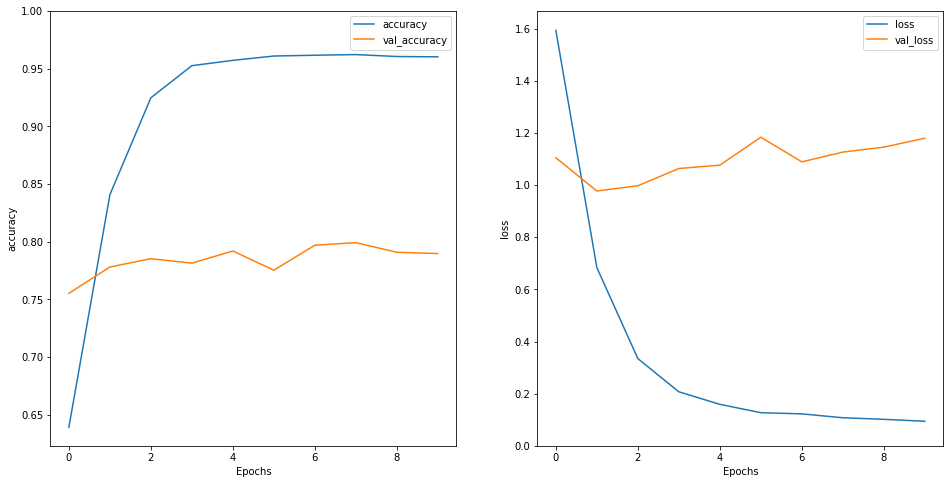

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_1, 'loss')
plt.ylim(0, None)

**Posibilidad 2**. Modelo con entrnamiento de un *embedding*. Primera capa de embedding para la incrustación de  palabras como vectores, seguido de una capa bidireccional LSTM, seguido que dos capas Dense que reducen el vector a una clase de las posibles para el texto.

In [ ]:
 model_2 = tf.keras.Sequential([
  layers.Embedding(35247, 128, input_length=max_sequence),
  layers.Bidirectional(layers.LSTM(64)),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])

 model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 128)          4511616   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 46)                2990      
Total params: 4,621,678
Trainable params: 4,621,678
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
history_2 = model_2.fit(x_train_2, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
225/225 [==============================] - 127s 336ms/step - loss: 1.9333 - accuracy: 0.5351 - val_loss: 1.5536 - val_accuracy: 0.6388
Epoch 2/10
225/225 [==============================] - 75s 334ms/step - loss: 1.3564 - accuracy: 0.6619 - val_loss: 1.2871 - val_accuracy: 0.6856
Epoch 3/10
225/225 [==============================] - 74s 330ms/step - loss: 1.0020 - accuracy: 0.7542 - val_loss: 1.1723 - val_accuracy: 0.7090
Epoch 4/10
225/225 [==============================] - 74s 330ms/step - loss: 0.7495 - accuracy: 0.8132 - val_loss: 1.2404 - val_accuracy: 0.7095
Epoch 5/10
225/225 [==============================] - 74s 330ms/step - loss: 0.5942 - accuracy: 0.8507 - val_loss: 1.2361 - val_accuracy: 0.7229
Epoch 6/10
225/225 [==============================] - 74s 329ms/step - loss: 0.4696 - accuracy: 0.8823 - val_loss: 1.2736 - val_accuracy: 0.7379
Epoch 7/10
225/225 [==============================] - 74s 331ms/step - loss: 0.3761 - accuracy: 0.9072 - val_loss: 1.3176 - val_a

In [ ]:
loss,accuracy = model_2.evaluate(x_test_2, y_test, verbose=1)
print("%s: %.2f%%" % (model_2.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model_2.metrics_names[1], accuracy*100))

71/71 [==============================] - 4s 54ms/step - loss: 1.3873 - accuracy: 0.7391
loss: 138.73%
accuracy: 73.91%


(0.0, 2.0189707800745964)

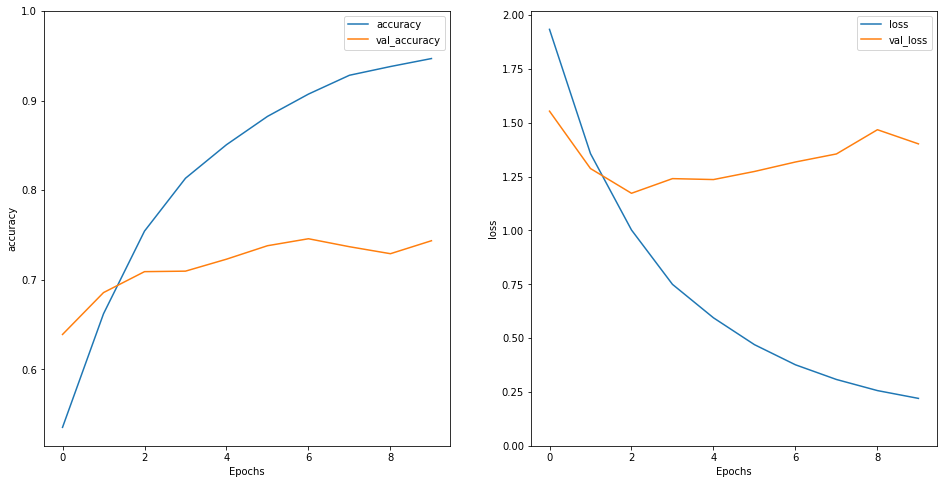

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_2, 'loss')
plt.ylim(0, None)

Posibilidad 3. Modelo con entrenamiento de un embedding. Primera capa de embedding para la incrustación de palabras como vectores, seguido de dos capas bidireccionales LSTM, seguido que dos capas Dense que reducen el vector a una clase de las posibles para el texto.

In [ ]:
 model_3 = tf.keras.Sequential([
  layers.Embedding(35247, 128, input_length=max_sequence),
  layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
  layers.Bidirectional(tf.keras.layers.LSTM(32)),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])

 model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 250, 128)          4511616   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 250, 128)          98816     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 46)                2990      
Total params: 4,658,798
Trainable params: 4,658,798
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
history_3 = model_3.fit(x_train_2, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
225/225 [==============================] - 123s 522ms/step - loss: 2.0717 - accuracy: 0.5086 - val_loss: 1.6315 - val_accuracy: 0.6004
Epoch 2/10
225/225 [==============================] - 118s 523ms/step - loss: 1.5118 - accuracy: 0.6287 - val_loss: 1.4473 - val_accuracy: 0.6361
Epoch 3/10
225/225 [==============================] - 118s 525ms/step - loss: 1.2455 - accuracy: 0.6843 - val_loss: 1.2997 - val_accuracy: 0.6761
Epoch 4/10
225/225 [==============================] - 118s 525ms/step - loss: 1.0143 - accuracy: 0.7415 - val_loss: 1.2451 - val_accuracy: 0.6900
Epoch 5/10
225/225 [==============================] - 118s 524ms/step - loss: 0.8181 - accuracy: 0.7942 - val_loss: 1.2692 - val_accuracy: 0.6912
Epoch 6/10
225/225 [==============================] - 118s 524ms/step - loss: 0.6752 - accuracy: 0.8285 - val_loss: 1.2481 - val_accuracy: 0.7129
Epoch 7/10
225/225 [==============================] - 117s 521ms/step - loss: 0.5711 - accuracy: 0.8514 - val_loss: 1.3046 -

In [ ]:
loss,accuracy = model_3.evaluate(x_test_2, y_test, verbose=1)
print("%s: %.2f%%" % (model_3.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model_3.metrics_names[1], accuracy*100))

71/71 [==============================] - 6s 90ms/step - loss: 1.4714 - accuracy: 0.7266
loss: 147.14%
accuracy: 72.66%


(0.0, 2.1582045793533324)

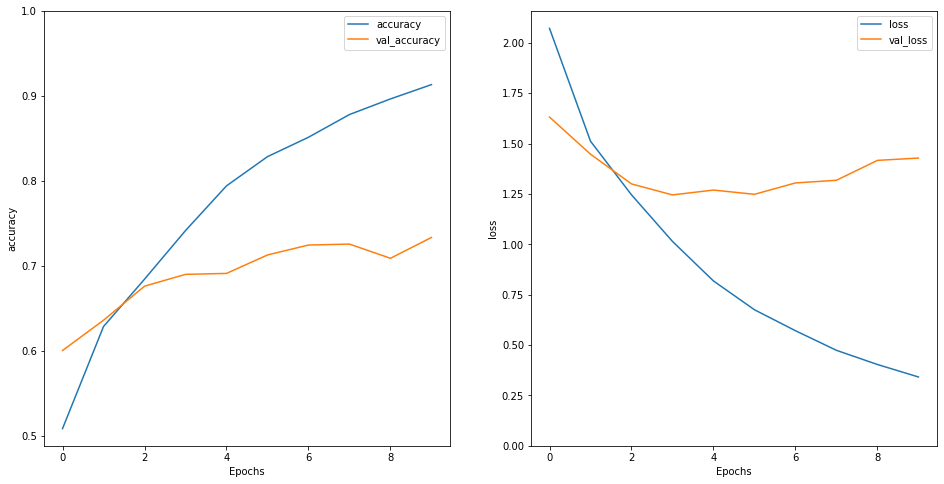

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_3, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_3, 'loss')
plt.ylim(0, None)

Posibilidad 4. Modelo con entrenamiento con word embedding y una capa encoder. Modelo anterior con un encoder antes del embedding de palabras.

In [ ]:
model_4 = tf.keras.Sequential([
  #  añadir encoder
  layers.Embedding(35247, 128, input_length=max_sequence),
  layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
  layers.Bidirectional(tf.keras.layers.LSTM(32)),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])

 model_4.summary()

In [ ]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
history_4 = model_4.fit(x_train_2, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

In [ ]:
loss,accuracy = model_4.evaluate(x_test_2, y_test, verbose=1)
print("%s: %.2f%%" % (model_3.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model_3.metrics_names[1], accuracy*100))

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_3, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_3, 'loss')
plt.ylim(0, None)